In [9]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [4]:
import polars as pl

In [11]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [36]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [37]:
df2=df1.drop(['area_type','availability','society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [38]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [48]:
df3 = df2.dropna().copy()  # Create an explicit copy to avoid the warning

df3.loc[:, 'size'] = df3['size'].fillna(df3['size'].mode()[0])
df3.loc[:, 'bath'] = df3['bath'].fillna(df3['bath'].median())
df3.loc[:, 'balcony'] = df3['balcony'].fillna(0)

df3.head()



,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [49]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [51]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [53]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [56]:
df3.head()
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [57]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [59]:
def is_range(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(is_range)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,0.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,0.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.0,0.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [65]:
##a function to make the string for sqft range into float
def convert(c):
    token=c.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(c)
    except:
        return None
##test the function
print(convert('804 - 2273'))

1538.5


In [76]:
df4=df3.copy()
print(df4.head()) 
df4['total_sqft'] = df4['total_sqft'].apply(convert)
df4.loc[30]

                   location       size total_sqft  bath  balcony   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0      3.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0      1.0   51.00    2


location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [79]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [85]:
df5['location']=df5['location'].apply(lambda a: a.strip())
len(df5.location.unique())

1294

In [86]:
df5.shape

(13319, 8)

In [97]:
location_stat=df5.groupby('location')['location'].agg('count')
len(location_stat[location_stat<10])
location_stats=location_stat[location_stat<10] 
df5.location=df5.location.apply(lambda x:'other' if x in location_stats else x)
len(df5.location.unique())

255

In [103]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12575, 8)

In [102]:
df6.price_per_sqft.describe()

count     12529.000000
mean       6304.053504
std        4162.395819
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [106]:
def remove_pps_outliers(df):
    ##Step 1: Create an Empty DataFrame
    df_out = pd.DataFrame()
    ##Group by location and Iterate Through Groups
    for key, subdf in df.groupby('location'):
        ##Calculate Mean and Standard Deviation for price_per_sqft
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        ##Filter Data Within 1 Standard Deviation of the Mean
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        ##Append the Filtered Data to df_out
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
     ##Return the Final DataFrame    
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape


(10281, 8)

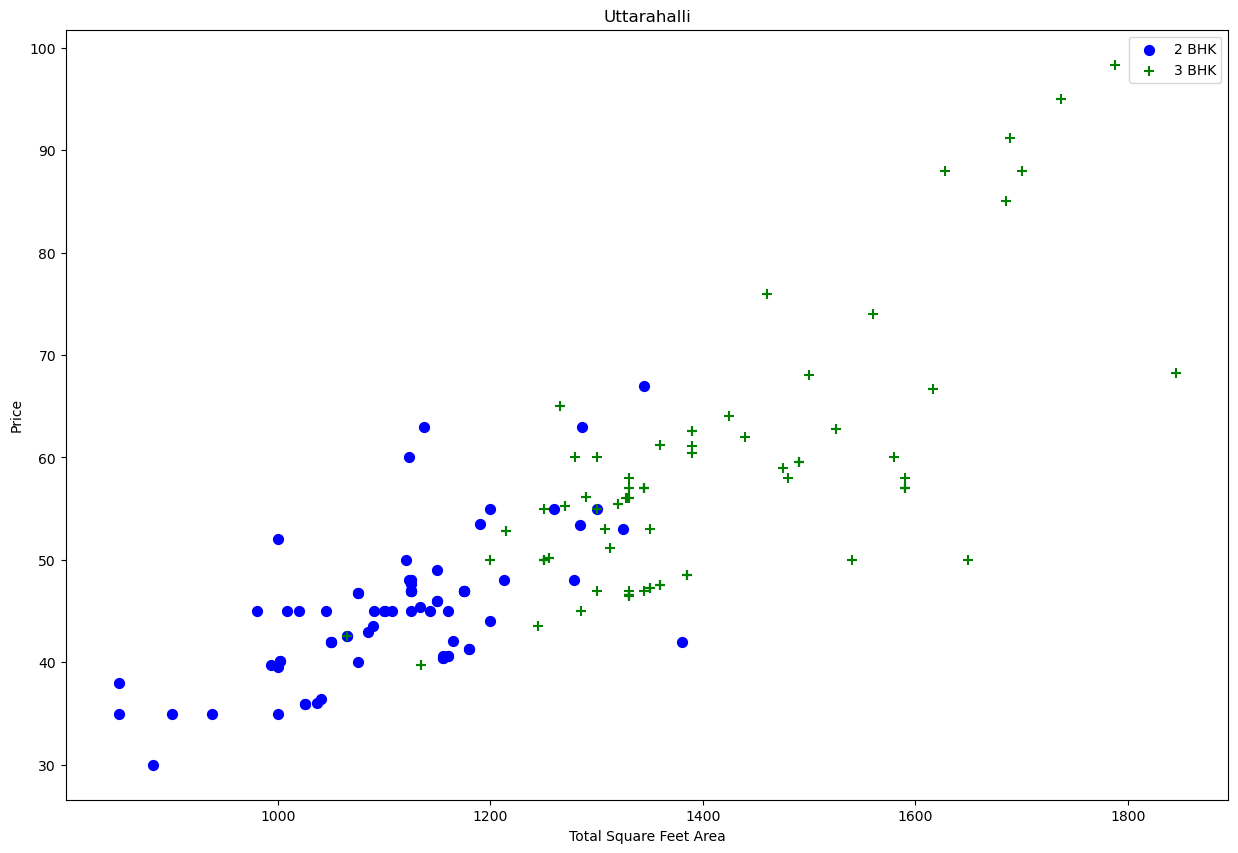

In [123]:
def plot_scatter_chart(df, location):
    # Filter for 2 BHK and 3 BHK properties in the given location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    # Set the figure size
    matplotlib.rcParams['figure.figsize'] = (15, 10)

    # Scatter plot for 2 BHK properties
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)

    # Scatter plot for 3 BHK properties
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)

    # Add labels and title
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()
plot_scatter_chart(df7,'Uttarahalli'	)

In [120]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
            'mean': np.mean(bhk_df.price_per_sqft),
            'std': np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
        }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices, axis='index')
df8 = remove_bhk_outliers(df7)
df8.head()
df8.shape

(7401, 8)

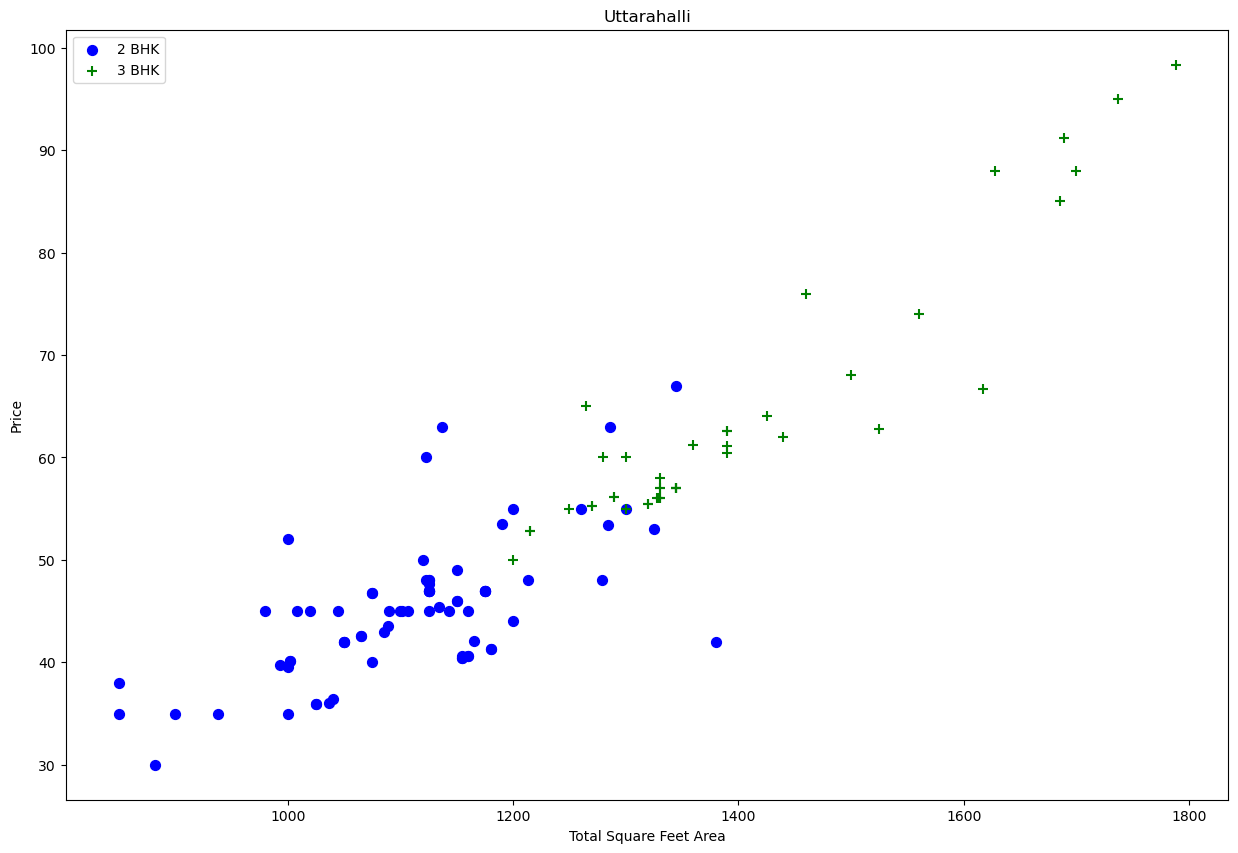

In [124]:
plot_scatter_chart(df8,'Uttarahalli'	)

Text(0, 0.5, 'count')

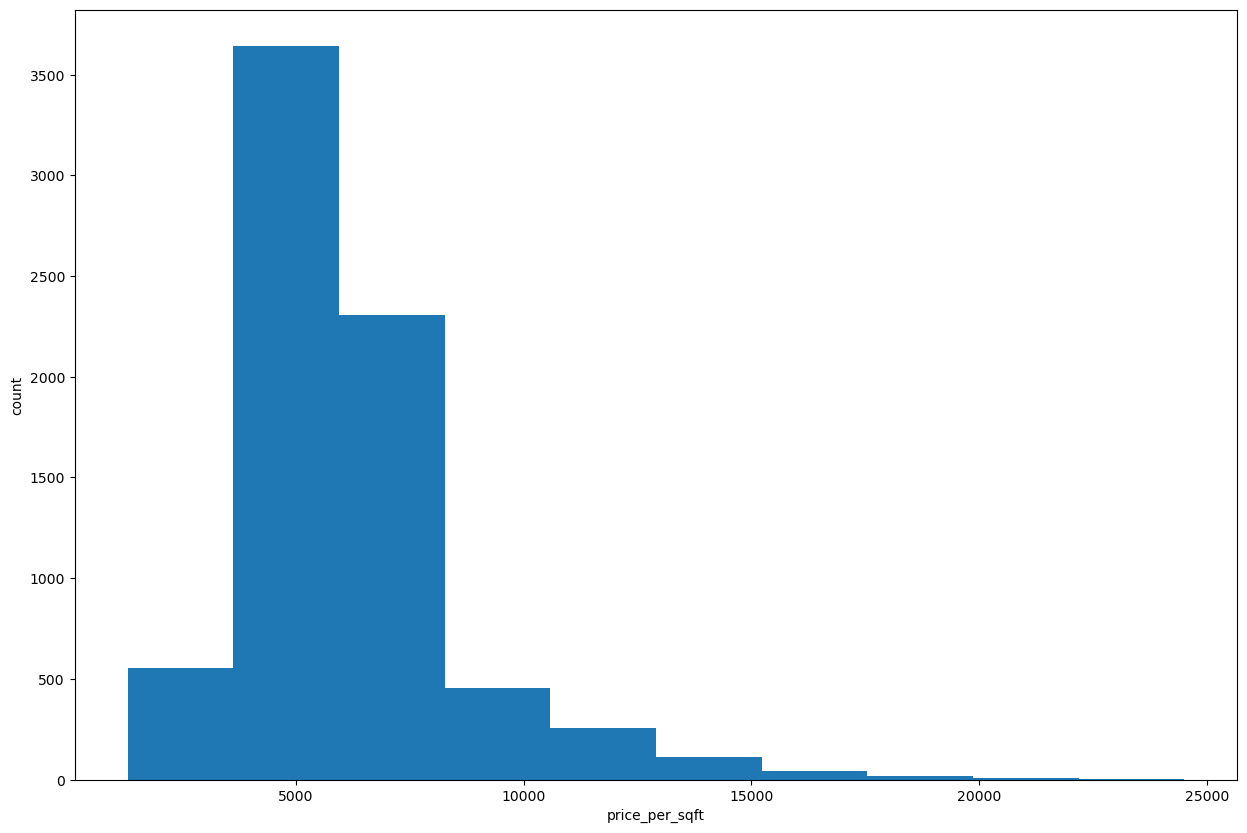

In [129]:
plt.hist(df8.price_per_sqft)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

In [132]:
df9=df8[df8.bhk<df8.bath+2]
df9.shape
df9.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [186]:
df10=df9.drop(['size','price_per_sqft','balcony'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [187]:
dtype=intdummies=pd.get_dummies(df10.location,dtype=int)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
df12.shape

(7353, 258)

In [191]:
X=df12.drop('price',axis='columns') 
Y=df12['price']
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
Y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)
linear_model.score(X_test,Y_test)

0.8757710458759752

In [194]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.preprocessing import StandardScaler
import pandas as pd

def find_best_model_using_gridsearchcv(X, Y):
    # Scale the input features (if normalization is required)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    algo = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algo.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [195]:
find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.776438,{'fit_intercept': True}
1,lasso,0.824766,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.679120,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [196]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1 

    # Convert x to a DataFrame with appropriate column names
    x_df = pd.DataFrame([x], columns=X.columns)

    # Pass the DataFrame to predict()
    return linear_model.predict(x_df)[0]

# Example usage
predict_price('1st Block Jayanagar', 1000, 2, 2)


202.66086413582082

In [197]:
predict_price('1st Block Jayanagar', 1000, 4, 4)

205.90353349711177

In [198]:
predict_price('1st Block Jayanagar', 1000, 3, 3)

204.2821988164663

In [199]:
predict_price('Yelenahalli', 1000, 2, 2)

24.967305549065934

In [200]:
import pickle
with open('houseprediction.pickle','wb') as f:
    pickle.dump(linear_model,f)

In [201]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('houseprediction','w')as f:
    f.write(json.dumps(columns))